# Assignment 1: Comparison of Multivariate Linear Regression Models
## Soukarya Ghosh (sg4fz)

### CS 4501 Machine Learning - Department of Computer Science - University of Virginia
*In this assignment, you will get to pick your favorite data set on Kaggle (https://kaggle.com) and implement some learning models in the context of a **regression** problem.  For references, you may refer to [my slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit#slide=id.p) or Chapter 4 of the textbook if you need additional sample codes to help with your assignment. To get started, you will need to determine which dataset to download and copy it into the directory where you wish to run your implementation (ie. same folder as this file).* 

*For deliverables, you must write code in Python and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.*


***
## 1. BIG PICTURE (5 pts)
Write a paragraph explaining the context of the problem in which you are trying to investigate. In the same paragraph, explain why you pick your dataset. Then, you MUST include the URL to the dataset to help the TA to download it (we will assume that the data file is put into the same folder as the Jupyter Notebook file). Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
     * **The dataset is 8 kb or 0.008 mb**
 * How many entries does it have?
     * **This dataset has a total of 1000 total rows**
 * How many features does it have?
     * **There are a total of 8 columns that will be used as features. The target column can be made into any of the three test scores. After fully pipelining te data with onehotencoder, the number of columns in the matrix will be 19 total.**
 * What are some basic statistics you can learn right away about this dataset?
     * **Data suggests that as score for one test goes up, the scores for the other tests goes up as well**

In [1]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Your code goes here for this section, make sure you also include the output to answer the above questions.
datasetURL = "https://www.kaggle.com/spscientist/students-performance-in-exams"; # required url to download for CSV file. The TA will need to download the file and run your program.

In [2]:
import os
import pandas as pd
import numpy as np

EDUCATION_PATH = "StudentsPerformance.csv"

def load_education_data(education_path=EDUCATION_PATH):
    return pd.read_csv(EDUCATION_PATH)

education = load_education_data()
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [3]:
corr_matrix = education.corr()
corr_matrix["math score"].sort_values(ascending=False)

math score       1.000000
reading score    0.817580
writing score    0.802642
Name: math score, dtype: float64

In [4]:
education.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


---
## 2. DATA DISCOVERY, CLEANING, AND SCALING (10 pts)

**Data Discover:** Plot out all correlations among the features. You may notice some features are more correlated with your predicted value than other. This information will help you confirm that weights of your regression model later on.

**Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the Imputer class. If your dataset has categorical features, make sure you conver those features into numerical using OneHotEncoder class. 

**Feature Scaling** More importantly, your task is to write some codes to normalize the value of each features as follow:

* Subtract the mean value of each feature from the dataset
* Scale (divide) the feature values by their respective standard deviation

Implementation Note: You will do this for all features and your code should work with datasets of all sizes (any number of features/ examples). After learning the parameters from the model, you must first normalize the new $x$ value using the mean and standard deviation that you have previously computed from the training set.

In [5]:
import matplotlib.pyplot as plt
#education.hist(bins=50, figsize=(20,15))

In [6]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(education, test_size=0.3, random_state=42)

In [7]:
education = train_set.drop("math score", axis=1)
#education_temp = education_temp.drop("reading score", axis=1)
#education = education_temp.drop("writing score", axis=1)
education_labels = train_set["math score"].copy()        #only testing math score for now

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())
    ])

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

education_num = education.drop('gender', axis=1)
education_num = education_num.drop('race/ethnicity', axis=1)
education_num = education_num.drop('parental level of education', axis=1)
education_num = education_num.drop('lunch', axis=1)
education_num = education_num.drop('test preparation course', axis=1)
num_attribs = list(education_num)
cat_attribs = ["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs)
    ])


education_prepared = (full_pipeline.fit_transform(education))

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(education_prepared, education_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
from sklearn.metrics import mean_squared_error

education_predictions = lin_reg.predict(education_prepared)
lin_mse = mean_squared_error(education_labels, education_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.248303471123559

In [12]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(education_prepared, education_labels)
education_predictions = tree_reg.predict(education_prepared)
tree_mse = mean_squared_error(education_labels, education_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.2988071523335984

In [13]:
# You might want to use the following package
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Your code goes here for this section.
X_train = education_prepared
y_train = education_labels


X_test_temp = test_set.drop("math score", axis=1)
#X_test_temp = X_test_temp.drop("reading score", axis=1)
#X_test_temp = X_test_temp.drop("writing score", axis=1)
X_test_prepared = (full_pipeline.transform(X_test_temp))


X_test = X_test_prepared
y_test = test_set["math score"].copy()

c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\pipeline.py:451: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


- - -
## 3. IMPLEMENTATION OF GRADIENT DESCENT (45 pts)
The gradient descent formulation remain the same as one in the lecture. Keep in mind that you will need to add a column $\textbf{x}_0$ with all 1s as part of the training data. You should write code to implement the **MyLinearRegression** class and its predefined methods. 

* **Gradient Descent:** Notes that you may NOT call the library linear regression which defeats the purpose of this assignment. Make sure your code supports any number of features and is well-vectorized.

In [14]:
# NOTE: You may not use the library Linear Regression, but implement your own!
# REMEMBER to place self.attribute = 0 with value from your implementation
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.theta = np.random.randn(20,1); # parameter vector;
        self.alpha = 0; # learning rate
        self.cost  = []; # cost function
  
    def fitUsingGradientDescent(self, X_train, y_train):
        # implementation code here
        X_b = np.insert(X_train, 0, 1, axis=1)
        self.alpha = 0.0001
        self.theta, cost = self.gradientDescent(X_b, y_train.values, self.theta, self.alpha, 1)
        lowestCost = cost
        for oof in range(100):
            tempT, tempCost = self.gradientDescent(X_b, y_train.values, self.theta, self.alpha, oof)
            if tempCost < lowestCost:
                self.theta = tempT
        
        # print(self.theta)
    
    
    def costCalc(self, theta, X_train, y_train):
        m = len(y_train)
        predictions = X_train.dot(theta)
        cost = (1/2*m)*np.sum(np.square(predictions-y_train))
        return cost
    
    
    def gradientDescent(self, X_train, y_train, theta, alpha, iters):
        # INPUT:
        # alpha: the learning rate
        # iters: number of iterations
        # 
        # OUTPUT: 
        # theta: updated value for theta
        # cost: value of the cost function
        #
        # implementation code here;

        eta = alpha # learning rate
        n_iterations = iters
        m = len(y_train)
        y_train = y_train.reshape(700,1)
        
        for iteration in range(n_iterations):
            gradients = 2/m * X_train.T.dot(X_train.dot(theta) - y_train)
            theta = theta - eta * gradients
            
        costT = self.costCalc(theta, X_train, y_train)
        self.cost.append(costT)

        return theta, costT

    
    def predict(self, X_test):
        # implementation code here 
        X_b = np.insert(X_test, 0, 1, axis=1)
        y_predict = X_b.dot(self.theta)

        return y_predict
    
    
    def fitUsingNormalEquation(self, X_train, y_train):
        # implementation code here for PART 4.
        X_b = np.insert(X_train, 0, 1, axis=1)
        y = y_train.values.reshape(700,1)
        
        self.theta = np.linalg.pinv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
        
        #print(self.theta)
        
    
# Your code goes here to call the instance of class MyLinearRegression
myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
a = myGradientDescentModel.predict(X_test)
sum = 0
#print(a)
# #print(y_train.values)
for x in range(300):
    sum += abs(a[x] - y_train.values[x])
    #print(a[x], y_test.values[x])
    
print("Avg Error: " + str(sum/300))

Avg Error: [14.96516438]


* **Learning Rate:** You will try out different learning rates for the dataset and find a learning rate that converges quickly. If you pick a learning rate, your plot of Cost Function $J(\theta)$ against number of iteration will quickly decay to a small value. This also indicates that your implementation is correct. If your learning rate is too large, the cost function $J(\theta)$ can diverge and blow up. From the below plot, you must be able to report the best learning rate the you found to earn credit for this section.

Text(0.5, 1.0, 'Error vs. Training Iterations')

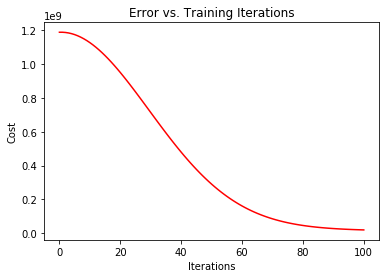

In [15]:
# Use the following code to plot out your learning rate
# iters and cost must be supplied to plot out the cost function
# You may plot multiple curves corresponding to different learning rates to justify the best one.

myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
a = myGradientDescentModel.predict(X_test)


plt.plot(list(range(len(myGradientDescentModel.cost))), myGradientDescentModel.cost, "r-")
plt.xlabel('Iterations')  
plt.ylabel('Cost')  
plt.title('Error vs. Training Iterations')  

- - -
## 4. IMPLEMENTATION OF THE NORMAL EQUATION (10 pts)

In my lecture, you learn that the closed form solution of linear regression using the normal equation formulation. Using the formula does not require any feature scaling, and should be straight forward to implement: 

$
    \mathbf{\theta} = ({\mathbf{X}^{T}\mathbf{X}})^{-1}\mathbf{X}^{T}\mathbf{y}.
$

Note that you still need to add a column of 1's to the $\mathbf{
X}$ matrix to have an intercept term.

In [16]:
# Implement the normalEquation method of the MyLinearRegression Class before execute the code below:
myNormalEquationModel = MyLinearRegression()
myGradientDescentModel.fitUsingNormalEquation(X_train, y_train)
normalfit = myGradientDescentModel.predict(X_test)
#print(normalfit)

sum = 0
for x in range(300):
    sum += abs(normalfit[x] - y_train.values[x])
    
print("Avg Error: " + str(sum/300))

Avg Error: [16.57880486]


- - -
## 5. COMPARISON OF DIFFERENT IMPLEMENTATIONS (20 pts)

You should be able to evaluate and compare your gradient descent as well as normal equation implementation of linear regression. In theory, they should be the same, or at least similar. For good measures, you may also use the built-in library **Scholastic Gradient Descent (SGD)** as a third model for comparison. For each model, you must compute the Root Mean Squared Error (RMSE) as performance measure. The good news is that you can call library functions to compute these as shown below instead of writing your own code:

* Which one yields the best performance measure for your dataset?
    * **The Normal Equation implementation has the lowest error as shown by the bar graph below. Although it is only a little better than the scikit learn baked SGD.**
* What is your assessment of the error? Good? Okay? Terrible?
    * **This error is a little bit underwhelming. Since these are test scores with stdev of about 15 for math (shown in the first section), the error is nearly one standard deviation away from the actual score the certain student would receive. This is not very accurate for our purposes and there would hopefully need to be a better model to fit this case. While it is 'ok' for ballparking, it can not be used to make any actual predictions or analysis of the features utilized, i.e. preparation, parent education, etc. I would think decision tree would be the best for this situation of modelling.**

SGD MSE: 5.672107813561309


c:\users\souka\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


myGradientDescentMode MSE: 8.710068641614837
myNormalEquationMode MSE: 5.557570799195738


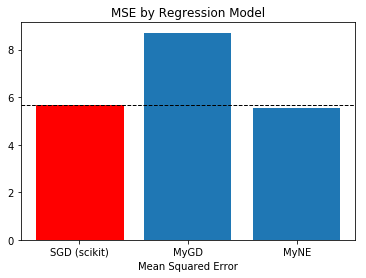

In [17]:
from sklearn.metrics import mean_squared_error

# Use the built-in SGD Regressor model
from sklearn.linear_model import SGDRegressor
mySGDModel = SGDRegressor()
mySGDModel.fit(X_train,y_train)
y_predict = mySGDModel.predict(X_test)
mse = mean_squared_error(y_test, y_predict)
mySGDModel_rmse = np.sqrt(mse)
print("SGD MSE: " + str(mySGDModel_rmse))

#myGradientDescentModel_rmse

myGradientDescentModel = MyLinearRegression()
myGradientDescentModel.fitUsingGradientDescent(X_train, y_train)
y_predict_mgd = myGradientDescentModel.predict(X_test)
mse_mgd = mean_squared_error(y_test, y_predict_mgd)
myGDModel_rmse = np.sqrt(mse_mgd)
print("myGradientDescentMode MSE: " + str(myGDModel_rmse))

#myNormalEquationModel_rmse 

myNormalEquationModel = MyLinearRegression()
myGradientDescentModel.fitUsingNormalEquation(X_train, y_train)
y_predict_ne = myGradientDescentModel.predict(X_test)
mse_ne = mean_squared_error(y_test, y_predict_ne)
myNEModel_rmse = np.sqrt(mse_ne)
print("myNormalEquationMode MSE: " + str(myNEModel_rmse))


x = np.arange(3)
errors = [mySGDModel_rmse, myGDModel_rmse, myNEModel_rmse]
barlist = plt.bar(x, errors)
plt.xticks(x, ('SGD (scikit)', 'MyGD', 'MyNE'))
plt.xlabel('Mean Squared Error')  
plt.title('MSE by Regression Model') 
barlist[0].set_color('r')
plt.axhline(y=mySGDModel_rmse, linewidth=1, color='k', linestyle="--")
plt.show()

- - -
## 6. PRESENTATION OF YOUR SOLUTION (10 pts)

Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/boss). Focus on answering the following: 

* How can you pitch your solution to this project? 
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution.

In [20]:
# Your paragraph goes here for this section
"""I would pitch the solution to this project as a proof of concept, showing that there exists a trend that can be 
approximated by self evaluated preparation (confidence), parental education, demographic info, and two other exam scores.
Based on these criterias, if a school is able to identify a group of students as being more likely to succeed/fail on an
exam, they can direct resources appropriately to make sure those who are struggling can be ultimately successful. I have
learned so far that the most impactful variables seem be the scores of the other exams, ideally we would want to slash 
these from the list as well, but for the purposes of this project, I wanted to see how they affected the overall fitting.
In terms of knowledge gained, I now have a much better understanding of the whole process instead of just copy-pasting
code. I can better understand what gd is doing under the hood and this will be invaluable going forward. In order to
improve the solution, I believe that it will be better to scrap the use of gradient descent and look for a better algorithm,
such as decision tree. Since the categorical data is almost always binary, this lends itself well to a decision tree
and could yield a lower rmse. I hope to revisit this project once I have more tools under my belt, I want to be the error
down to 5% within the actual test scores, not using any of the other test scores as features. If I could do that, then
there could potentially be some real impactful followups being done here."""

'I would pitch the solution to this project as a proof of concept, showing that there exists a trend that can be \napproximated by self evaluated preparation (confidence), parental education, demographic info, and two other exam scores.\nBased on these criterias, if a school is able to identify a group of students as being more likely to succeed/fail on an\nexam, they can direct resources appropriately to make sure those who are struggling can be ultimately successful. I have\nlearned so far that the most impactful variables seem be the scores of the other exams, ideally we would want to slash \nthese from the list as well, but for the purposes of this project, I wanted to see how they affected the overall fitting.\nIn terms of knowledge gained, I now have a much better understanding of the whole process instead of just copy-pasting\ncode. I can better understand what gd is doing under the hood and this will be invaluable going forward. In order to\nimprove the solution, I believe that

- - - 
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [slides](https://docs.google.com/presentation/d/10D1he89peAWaFgjtZlHpUzvOOAie_vIFT95htKCKgc0/edit?usp=sharing) and/or the textbook
 * Talk to the TA, they are available and there to help you during [office hour](http://bit.ly/cs4501oh)
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4501 Assignment 1:...".

Best of luck and have fun!